In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
rd=pd.read_excel('Restaurant Food Cost Data_Train.xlsx')

In [3]:
rd

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
rd.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [5]:
# Checking null values
rd.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [6]:
rd['RATING'].replace( 'NEW', 0, inplace=True)
rd['RATING'].replace( '-', 0, inplace=True)

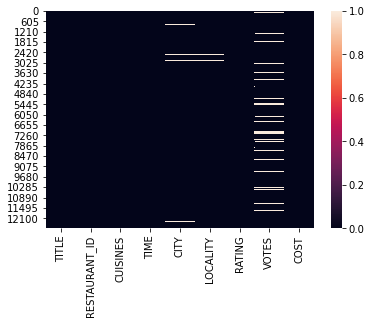

In [7]:
# Checking null values using heatmap for better understanding
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(rd.isnull())

In [8]:
# Checking unique value of cost column
rd['COST'].value_counts()


300      1595
400      1357
500      1300
200      1031
600       806
         ... 
4100        1
70          1
14000       1
1950        1
80          1
Name: COST, Length: 86, dtype: int64

In [9]:
# Checking unique value of object data type's columns.

for i in rd.columns:
    if rd[i].dtype==object:
        print(rd[i].value_counts())
        print('**********************************')
        print('\n')

QUICK BITES                    4218
CASUAL DINING                  3652
None                           1003
CAFÉ                            607
DESSERT PARLOR                  382
                               ... 
BEVERAGE SHOP,CASUAL DINING       1
DESSERT PARLOR,PAAN SHOP          1
CAFÉ,LOUNGE                       1
CLUB,MICROBREWERY                 1
SWEET SHOP,CONFECTIONERY          1
Name: TITLE, Length: 113, dtype: int64
**********************************


South Indian                                                 532
North Indian                                                 526
North Indian, Chinese                                        501
Fast Food                                                    286
Chinese                                                      167
                                                            ... 
Continental, European, Asian, Seafood, Spanish                 1
Cafe, Burger, Sandwich                                         1
European

In [10]:
# Checking missing values again
rd.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [11]:
# Falling city,locality and rating columns null values using simpleimputer method
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
rd['CITY']=imp.fit_transform(rd['CITY'].values.reshape(-1,1))
rd['LOCALITY']=imp.fit_transform(rd['LOCALITY'].values.reshape(-1,1))

In [12]:
rd['RATING'] = rd['RATING'].astype(float)

In [13]:
rd['RATING']=imp.fit_transform(rd['RATING'].values.reshape(-1,1))

In [14]:
rd.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES            1204
COST                0
dtype: int64

In [15]:
rd['VOTES']=rd['VOTES'].replace([" votes"],"",regex=True)

In [16]:
rd['VOTES'].value_counts()

44      71
28      66
29      66
38      65
35      64
        ..
9506     1
5627     1
908      1
4606     1
1632     1
Name: VOTES, Length: 1847, dtype: int64

In [17]:
rd['VOTES']=imp.fit_transform(rd['VOTES'].values.reshape(-1,1))

In [18]:
rd['VOTES'] = rd['VOTES'].astype(int)

In [19]:
rd.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int32
COST               int64
dtype: object

In [20]:
rd_cor=rd.corr()

In [21]:
rd_cor

,RESTAURANT_ID,RATING,VOTES,COST
RESTAURANT_ID,1.000000,0.031314,0.000403,0.040710
RATING,0.031314,1.000000,0.243875,0.232194
VOTES,0.000403,0.243875,1.000000,0.255723
COST,0.040710,0.232194,0.255723,1.000000


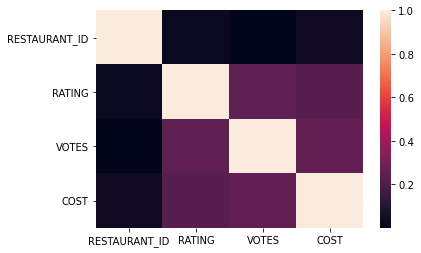

In [22]:
sns.heatmap(rd_cor)

Text(0.5, 1.0, 'Correlation with target Variable')

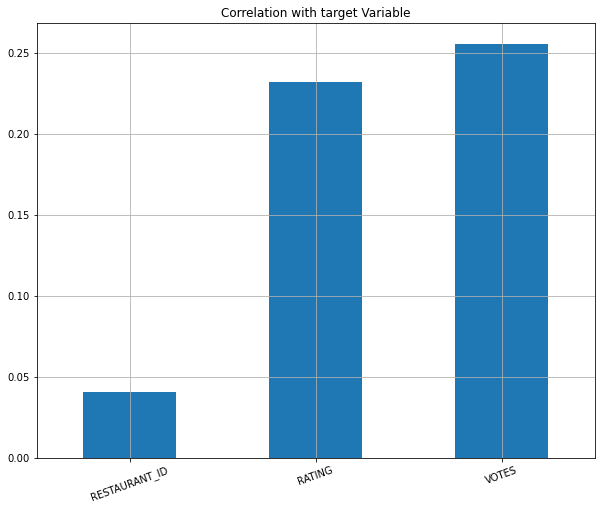

In [23]:
plt.figure(figsize=(10,8))
rd.drop('COST',axis=1).corrwith(rd['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('Correlation with target Variable')

# Summary Statistics

In [24]:
# Checking general summary statistics of dataset
rd.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,3.426911,380.405753,655.252246
std,4504.874150,1.179029,809.110447,627.003540
min,0.000000,0.000000,4.000000,20.000000
25%,3863.250000,3.400000,44.000000,300.000000
50%,7740.000000,3.800000,132.000000,500.000000
75%,11688.750000,4.000000,405.000000,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


Observation - There are huge difference between 75% and maximum in votes and cost, So in these columns outliers may be present.

# Data Visualization

Univariate Analysis

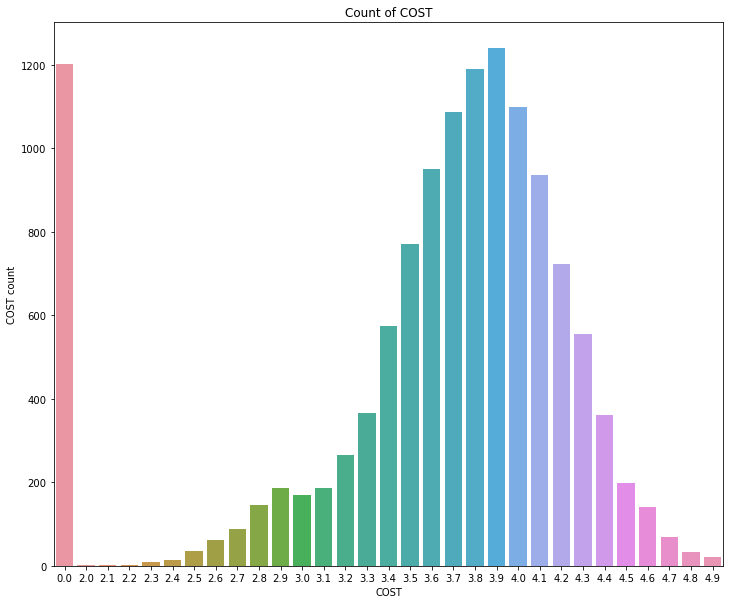

3.9    1240
0.0    1202
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64


In [25]:
# Checking cost count

plt.subplots(figsize=(12,10))
sns.countplot(x='RATING',data=rd)
plt.title('Count of COST')
plt.xlabel('COST')
plt.ylabel('COST count')
plt.show()

print(rd.RATING.value_counts())

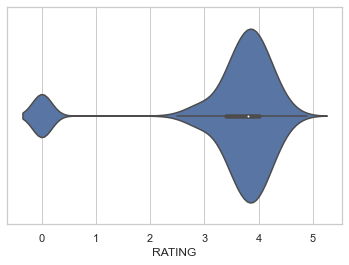

In [26]:
# Checking RATING count using violinplot.
sns.set(style='whitegrid')
sns.violinplot(rd['RATING'])
plt.show()

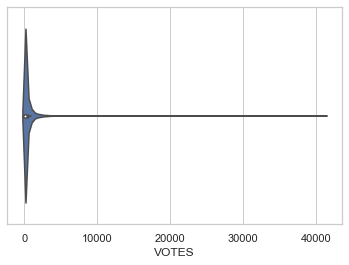

In [27]:
# Checking VOTES count using violinplot.
sns.set(style='whitegrid')
sns.violinplot(rd['VOTES'])
plt.show()

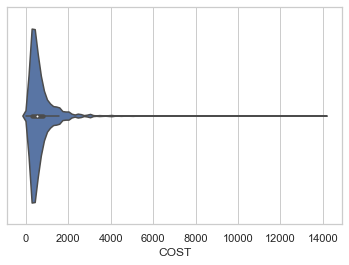

In [28]:
# Checking COST count using violinplot.
sns.set(style='whitegrid')
sns.violinplot(rd['COST'])
plt.show()

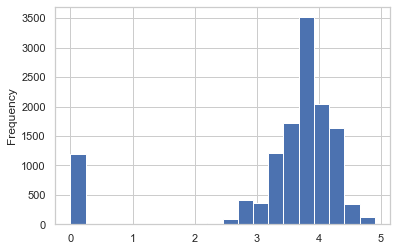

In [29]:
rd['RATING'].plot.hist(bins=20)

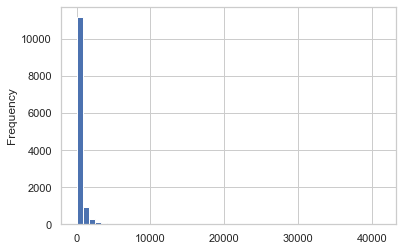

In [30]:
rd['VOTES'].plot.hist(bins=50)

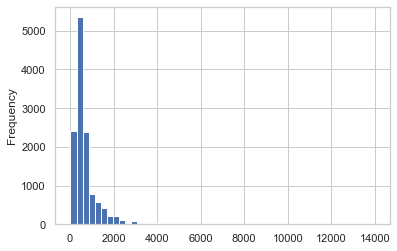

In [31]:
rd['COST'].plot.hist(bins=50)

In [32]:
rd.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int32
COST               int64
dtype: object

# Bivariate Analysis

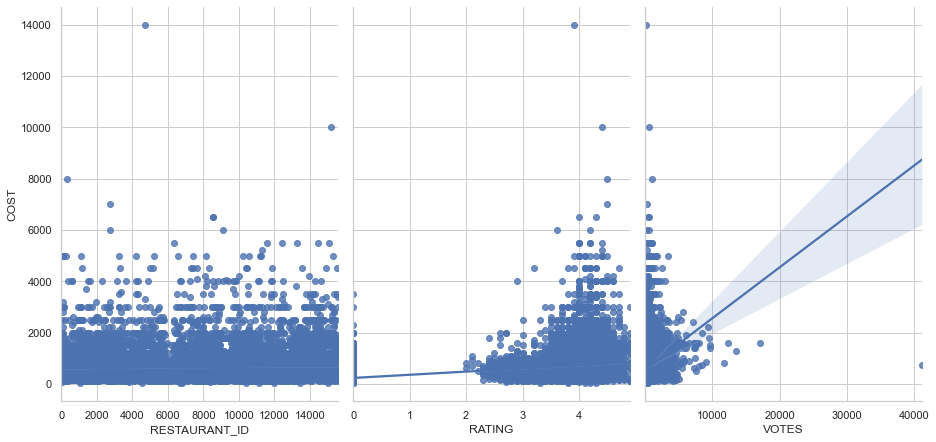

In [33]:
sns.pairplot(rd, x_vars=['RESTAURANT_ID','RATING','VOTES'], y_vars='COST' ,size=6, aspect=0.7, kind='reg')

# Handling categorical data

In [34]:
# Use label encoder to change data type in object data type columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
list=['TITLE','CUISINES', 'TIME', 'CITY', 'LOCALITY']
for val in list:
    rd[val]=le.fit_transform(rd[val].astype(str))

In [35]:
rd.dtypes

TITLE              int32
RESTAURANT_ID      int64
CUISINES           int32
TIME               int32
CITY               int32
LOCALITY           int32
RATING           float64
VOTES              int32
COST               int64
dtype: object

# Plotting and Removing outliers

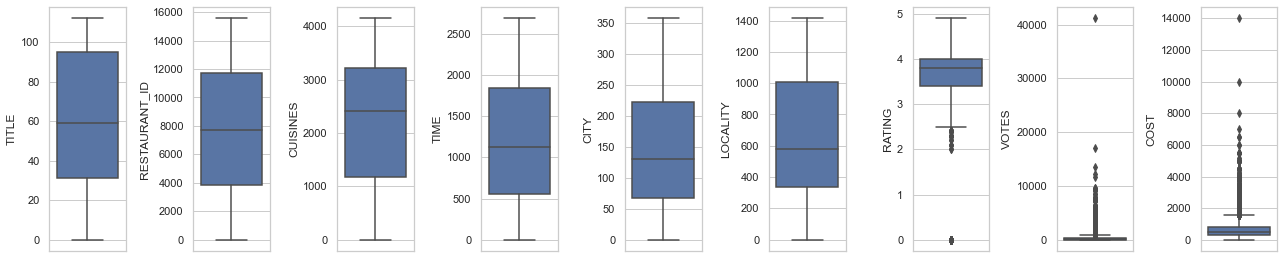

In [36]:
collist=rd.columns.values
ncol=10
nrow=5

plt.figure(figsize=(20,18))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(rd[collist[i]],orient='v')
    plt.tight_layout()

Observation - above data shows outliers present in Rating,votes and cost columns.

In [37]:
# Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(rd))
z

array([[0.86888688, 0.37269233, 0.32540837, ..., 0.14681221, 0.40960886,
        0.86884552],
       [0.80783894, 1.20737672, 1.61638078, ..., 0.65572557, 0.43309237,
        1.34733058],
       [0.86888688, 0.70057234, 0.61526483, ..., 0.31645   , 0.19702135,
        0.23086546],
       ...,
       [0.35207201, 0.74896628, 0.12224961, ..., 0.48608779, 0.28130055,
        1.02834054],
       [0.86888688, 0.36076439, 1.055448  , ..., 0.06199332, 0.43062042,
        0.40711461],
       [0.86888688, 0.29505519, 0.59034881, ..., 0.02282557, 0.36658275,
        0.08812458]])

In [38]:
threshold=3
print(np.where(z>3))

(array([   84,   186,   196,   208,   293,   303,   304,   308,   337,
         344,   354,   379,   422,   431,   469,   502,   510,   563,
         731,   775,   796,   839,   852,   855,   872,   913,   966,
         967,   973,  1034,  1038,  1132,  1133,  1147,  1151,  1193,
        1244,  1288,  1345,  1346,  1395,  1467,  1470,  1475,  1476,
        1522,  1540,  1594,  1617,  1632,  1657,  1681,  1685,  1759,
        1778,  1828,  1850,  1878,  1884,  1916,  1930,  1931,  2090,
        2100,  2111,  2204,  2205,  2207,  2268,  2302,  2305,  2333,
        2339,  2349,  2369,  2412,  2459,  2488,  2531,  2604,  2610,
        2622,  2683,  2686,  2689,  2695,  2740,  2886,  2905,  2940,
        2973,  2977,  3002,  3028,  3033,  3036,  3049,  3197,  3211,
        3289,  3309,  3333,  3338,  3396,  3398,  3408,  3492,  3507,
        3526,  3532,  3554,  3578,  3587,  3603,  3688,  3692,  3704,
        3706,  3715,  3728,  3730,  3773,  3841,  3847,  3855,  3877,
        3891,  3896

In [39]:
rd_new=rd[(z<3).all(axis=1)]

In [40]:
print(rd.shape)

(12690, 9)


In [41]:
print(rd_new.shape)

(12267, 9)


Observation - Now approx 400 rows removed due to outliers present.

# Checking skewness

In [42]:
rd_new.skew()

TITLE           -0.081885
RESTAURANT_ID    0.013100
CUISINES        -0.216513
TIME             0.318396
CITY             0.282131
LOCALITY         0.350438
RATING          -2.185625
VOTES            2.607065
COST             1.822529
dtype: float64

In [43]:
# Treating skewness via log method

rd_new.skew()
for col in rd_new.skew().index:
    if rd_new[col].skew()>0.55:
        if rd_new[col].skew()<-0.55:
            rd_new[col]=np.log1p(rd_new[col])

In [44]:
rd_new.skew()

TITLE           -0.081885
RESTAURANT_ID    0.013100
CUISINES        -0.216513
TIME             0.318396
CITY             0.282131
LOCALITY         0.350438
RATING          -2.185625
VOTES            2.607065
COST             1.822529
dtype: float64

# model Training

In [45]:
# Separating data into input and output variables.

rd_x=rd_new.drop(columns=['COST'])
y=pd.DataFrame(rd_new['COST'])

In [46]:
y

,COST
0,1200
1,1500
2,800
3,800
4,300
...,...
12685,500
12686,1800
12687,1300
12688,400


In [47]:
# Scaling the input Variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(rd_x)
x=pd.DataFrame(x,columns=rd_x.columns)

In [48]:
x

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.868661,0.376686,0.324440,-0.572899,2.126584,-0.920062,0.168282,-0.583610
1,-0.808136,1.212268,-1.609946,0.938713,-0.895507,0.984036,0.673476,-0.626514
2,-0.868661,0.704918,0.613191,-0.675783,-0.895507,1.121652,0.336680,-0.195209
3,1.068148,-0.310447,1.567973,-1.184930,0.955972,-1.292875,0.589277,-0.640063
4,-0.293671,1.698728,-0.387924,-0.736459,0.955972,-0.081859,0.336680,-0.321665
...,...,...,...,...,...,...,...,...
12262,1.068148,1.218935,0.578442,-0.038690,-0.131025,-0.777443,0.336680,0.538686
12263,-0.808136,0.431798,-0.076006,0.004838,0.955972,-1.300382,0.757675,2.047124
12264,0.341844,0.753364,-0.121511,-0.047924,1.159037,1.724658,0.505078,0.678691
12265,-0.868661,-0.357560,1.051696,0.875399,-0.895507,-0.054336,0.084082,-0.621998


In [49]:
# make import and output variables into traina dn test data

from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.22)

In [51]:
# Checking train and test data size

print(x_train.shape, '\t' , x_test.shape)

(9568, 8) 	 (2699, 8)


In [52]:
print(y_train.shape, '\t' , y_test.shape)

(9568, 1) 	 (2699, 1)


In [53]:
# Importing models library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing error metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [54]:
# Using algorithms via for loop

model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]

for s in model:
    s.fit(x_train,y_train)
    print('Score of', s , 'is:' , s.score(x_train,y_train))
    preds=s.predict(x_test)
    print('Error:')
    print('Mean absolute error:' , mean_absolute_error(y_test,preds))
    print('Mean squared error:', mean_squared_error(y_test,preds))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))
    print('r2_score:', r2_score(y_test,preds))
    print('********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.26441447341308544
Error:
Mean absolute error: 251.88035585599195
Mean squared error: 134664.30625942416
Root Mean squared error: 366.9663557595221
r2_score: 0.2544813040628141
********************************************************************************************


Score of Lasso() is: 0.2643773300480985
Error:
Mean absolute error: 251.7657039962705
Mean squared error: 134595.33446284634
Root Mean squared error: 366.8723680830247
r2_score: 0.25486314068507465
********************************************************************************************


Score of Ridge() is: 0.26441447149597486
Error:
Mean absolute error: 251.87999477876315
Mean squared error: 134663.8102714386
Root Mean squared error: 366.9656799639969
r2_score: 0.25448404991527096
********************************************************************************************


Score of ElasticNet() is: 0.24317653136073536
Error:
Mean absolute error: 256.39217800639904
Mean squared er

Note - Find out best result with DecisionTreeRegressor

In [55]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeRegressor()
parameters={'random_state':range(0,100)}
gc=GridSearchCV(dt,parameters)
gc.fit(x,y)
gc.best_params_

{'random_state': 29}

In [56]:
# Finding out best parameter using Gridsearch CV

from sklearn.model_selection import GridSearchCV

parameters1={'criterion' :['mse', 'friedman_mse', 'mae', 'poisson']}
gc=GridSearchCV(dt,parameters1)
gc.fit(x,y)
gc.best_params_

{'criterion': 'friedman_mse'}

In [57]:
#Using Decisiontreeregressor with best results

dt=DecisionTreeRegressor(criterion='friedman_mse',random_state=29)

In [58]:
dt.fit(x_train,y_train)
print('Score' ,dt.score(x_train,y_train))
preddt=dt.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))
print('\n')
print('r2_score:', r2_score(y_test,preddt))

Score 1.0


Mean absolute error: 227.91885883660615
Mean squared error: 116072.53390144499
Root Mean squared error: 340.6941941117356


r2_score: 0.35740771617962297


# Using Ensemble Technique to boostup score

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=64)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score:', r2_score(y_test,predrf))

score: 0.95696536637143


Mean absolute error: 165.75032604668397
Mean squared error: 56443.09624723972
Root Mean squared error: 237.57755838302515


r2_score: 0.6875238533673848


In [60]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor(base_estimator=dt,n_estimators=20,learning_rate=1.0)
ad.fit(x_train,y_train)
print('score:',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))
print('\n')
print('r2_score:', r2_score(y_test,predad))

score: 0.9980933378705951


Mean absolute error: 165.20711374583178
Mean squared error: 58591.0967024824
Root Mean squared error: 242.0559784481317


r2_score: 0.6756322501449241


RandomForestRegressor is working well because it gives the best r2 score. So i will save RandomForestRegressor my final Model.

In [61]:
#Cross validate of AdaBoostRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [0.66484176 0.64391191 0.65356908 0.64798656 0.6928356 ]
Mean Score: 0.017573541325940863
Standard Deviation: 0.017573541325940863


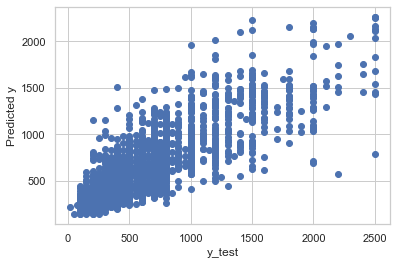

In [62]:
# Plotting scatter plot between test data and predicted data 
plt.scatter(y_test,predrf)
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.show()

In [63]:
import joblib

In [64]:
joblib.dump(rd,'Restaurant Food Cost.pkl')

['Restaurant Food Cost.pkl']